# Sorting Algorithms

In [1]:
import random
import time
from typing import List, Callable, Generator

In [2]:
def quick_sort(arr):
    a = arr.copy()

    def _quick_sort(lo, hi):
        if lo < hi:
            p = partition(lo, hi)
            _quick_sort(lo, p - 1)
            _quick_sort(p + 1, hi)

    def partition(lo, hi):
        pivot = a[hi]
        i = lo
        for j in range(lo, hi):
            if a[j] <= pivot:
                a[i], a[j] = a[j], a[i]
                i += 1
        a[i], a[hi] = a[hi], a[i]
        return i

    _quick_sort(0, len(a) - 1)
    return a
def heap_sort(arr):
    a = arr.copy()
    n = len(a)

    def heapify(size, i):
        largest = i
        left = 2 * i + 1
        right = 2 * i + 2

        if left < size and a[left] > a[largest]:
            largest = left
        if right < size and a[right] > a[largest]:
            largest = right
        if largest != i:
            a[i], a[largest] = a[largest], a[i]
            heapify(size, largest)

    # Build max heap
    for i in range(n // 2 - 1, -1, -1):
        heapify(n, i)

    # Extract elements one by one
    for i in range(n - 1, 0, -1):
        a[i], a[0] = a[0], a[i]
        heapify(i, 0)

    return a
def bubble_sort(arr: List[int]) -> List[int]:
    a = arr.copy()
    n = len(a)
    for i in range(n):
        for j in range(0, n - i - 1):
            if a[j] > a[j + 1]:
                a[j], a[j + 1] = a[j + 1], a[j]
    return a

def insertion_sort(arr: List[int]) -> List[int]:
    a = arr.copy()
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        while j >= 0 and a[j] > key:
            a[j + 1] = a[j]
            j -= 1
        a[j + 1] = key
    return a

def merge_sort(arr):
    if len(arr) <= 1:
        return arr.copy()

    # Split list in half
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])

    # Merge halves
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

def sort_list(arr, algorithm="bubble"):
    if algorithm == "bubble":
        return bubble_sort(arr)

    elif algorithm == "insertion":
        return insertion_sort(arr)

    elif algorithm == "merge":
        return merge_sort(arr)

    elif algorithm == "quick":
        return quick_sort(arr)

    elif algorithm == "heap":
        return heap_sort(arr)


In [3]:
def generate_permutation(n):
    perm = list(range(1, n + 1))
    random.shuffle(perm)
    return perm


In [4]:
def test_algorithm(n=100):
    perm = generate_permutation(n)
    print(f"Original list: {perm}\n")

    algorithms = ["bubble", "insertion", "merge", "quick", "heap"]

    for alg in algorithms:
        start = time.perf_counter()
        result = sort_list(perm, alg)
        elapsed = time.perf_counter() - start
        print(f"{alg} sort: {result}")
        print(f"Time: {elapsed:.6f} seconds\n")

In [5]:
# Test our sorting algorithms
test_algorithm(100)

Original list: [100, 32, 70, 30, 46, 92, 26, 89, 74, 23, 38, 9, 88, 84, 78, 10, 98, 1, 2, 65, 83, 52, 20, 85, 21, 11, 24, 53, 36, 64, 68, 18, 16, 90, 19, 45, 34, 55, 81, 94, 61, 49, 56, 63, 67, 27, 40, 37, 15, 25, 39, 86, 60, 71, 6, 8, 87, 41, 12, 59, 42, 13, 33, 76, 50, 79, 7, 58, 35, 5, 69, 29, 97, 48, 44, 57, 31, 43, 28, 62, 82, 14, 72, 77, 93, 96, 75, 54, 95, 91, 73, 66, 3, 22, 17, 51, 47, 80, 99, 4]

bubble sort: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
Time: 0.000568 seconds

insertion sort: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 3

# Simple Performance Comparison


In [6]:
import matplotlib.pyplot as plt
import numpy as np

def compare_algorithms(sizes=None):
    if sizes is None:
        sizes = [10, 100, 500, 1000]
    results = {}

    # Generate different test cases
    test_cases = {
        "random": lambda n: generate_permutation(n),
        "sorted": lambda n: list(range(1, n+1)),
        "reversed": lambda n: list(range(n, 0, -1))
    }

    for size in sizes:
        print(f"Testing with size = {size}")
        results[size] = {}

        for case_name, generator in test_cases.items():
            print(f"  Case: {case_name}")
            results[size][case_name] = {}

            # Generate test data
            data = generator(size)

            # Test each algorithm
            for alg in ["bubble", "insertion", "merge", "quick", "heap"]:
                start = time.perf_counter()
                sort_list(data, alg)
                elapsed = time.perf_counter() - start
                results[size][case_name][alg] = elapsed
                print(f"    {alg}: {elapsed:.6f} seconds")

    return results


Testing with size = 10
  Case: random
    bubble: 0.000014 seconds
    insertion: 0.000007 seconds
    merge: 0.000032 seconds
    quick: 0.000015 seconds
    heap: 0.000019 seconds
  Case: sorted
    bubble: 0.000009 seconds
    insertion: 0.000003 seconds
    merge: 0.000023 seconds
    quick: 0.000016 seconds
    heap: 0.000017 seconds
  Case: reversed
    bubble: 0.000012 seconds
    insertion: 0.000008 seconds
    merge: 0.000025 seconds
    quick: 0.000014 seconds
    heap: 0.000014 seconds
Testing with size = 20
  Case: random
    bubble: 0.000035 seconds
    insertion: 0.000021 seconds
    merge: 0.000050 seconds
    quick: 0.000020 seconds
    heap: 0.000033 seconds
  Case: sorted
    bubble: 0.000021 seconds
    insertion: 0.000004 seconds
    merge: 0.000040 seconds
    quick: 0.000042 seconds
    heap: 0.000037 seconds
  Case: reversed
    bubble: 0.000037 seconds
    insertion: 0.000025 seconds
    merge: 0.000040 seconds
    quick: 0.000032 seconds
    heap: 0.000030 seco

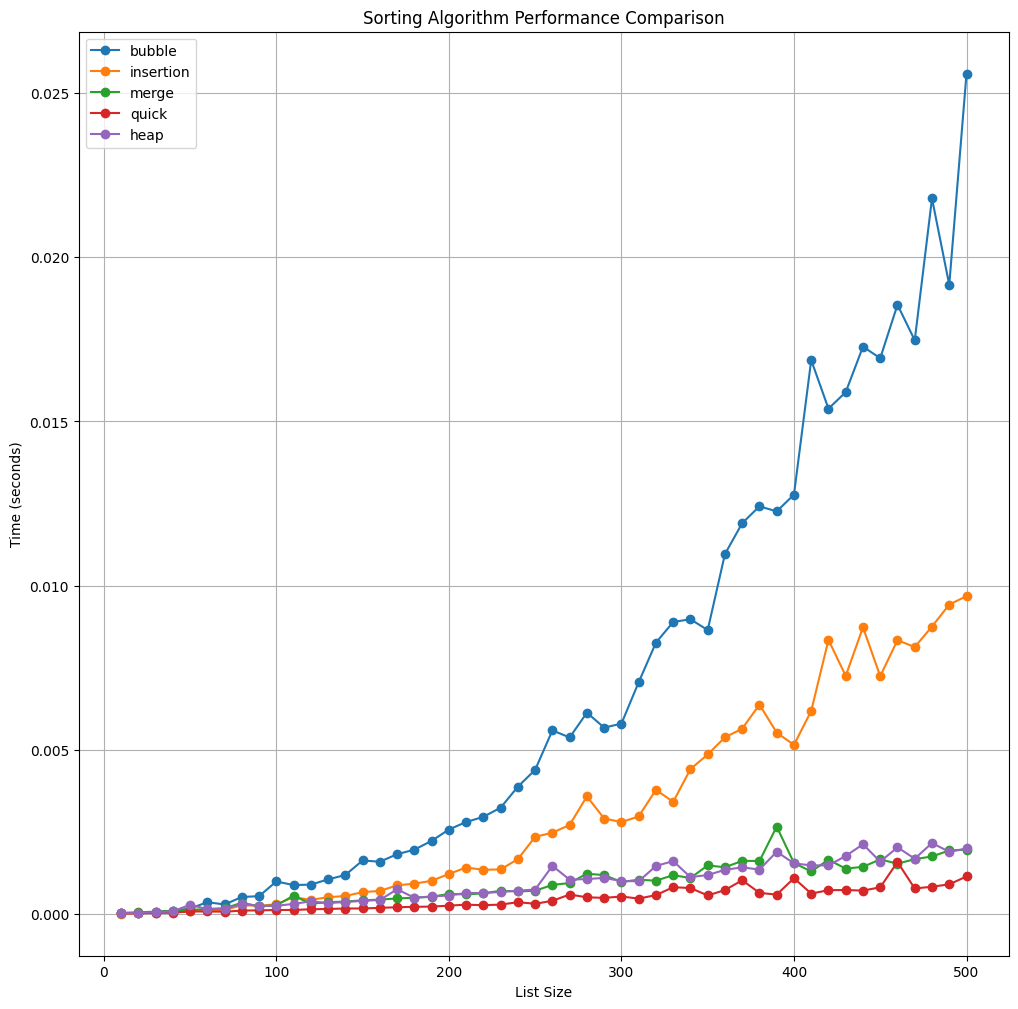

In [9]:
# Run a smaller comparison for demonstration
sizes = [i for i in range(10, 501, 10)]  # Sizes from 10 to 100
results = compare_algorithms(sizes)

# Plot results
plt.figure(figsize=(12, 12))

# Just plot results for random data
for alg in ["bubble", "insertion", "merge", "quick", "heap"]:
    times = [results[size]["random"][alg] for size in sizes]
    plt.plot(sizes, times, marker='o', label=alg)

plt.xlabel('List Size')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithm Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()


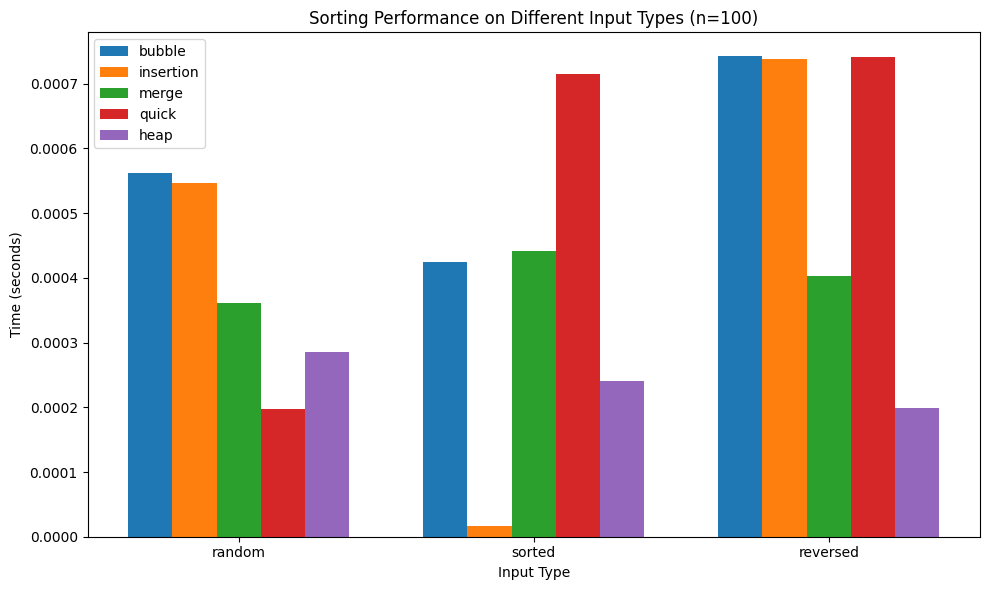

In [8]:
# Compare algorithms on different input types
size = 100
plt.figure(figsize=(10, 6))

cases = ["random", "sorted", "reversed"]

width = 0.15
offset = 0

for alg in ["bubble", "insertion", "merge", "quick", "heap"]:
    times = [results[size][case][alg] for case in cases]
    plt.bar(x + offset, times, width, label=alg)
    offset += width

plt.xlabel('Input Type')
plt.ylabel('Time (seconds)')
plt.title(f'Sorting Performance on Different Input Types (n={size})')
x = np.arange(len(cases))
plt.xticks(x + width*2, cases)
plt.legend()
plt.tight_layout()
plt.show()


## Summary

- Bubble sort and insertion sort are simpler but slower (O(n²))
- Merge sort, quick sort, and heap sort are faster (O(n log n))
- Merge sort performs stable on all inputs
- Quick sort can have problems with already sorted lists
- Different algorithms perform better on different types of input
